This notebook reproduces 

> **Fig 11**: Stark states of $n=30$ and 31 states of Ps, with $m=2$ (grey dashed) and $m=29$ (black). In the $n=30$ level, the $m=29$ state is a circular state and experiences no first-order Stark shift and only a very weak second-order shift, as explained in the text.

from the article

> #### Prospects for Studies of the Free Fall and Gravitational Quantum States of Antimatter
>
> G. Dufour, D. B. Cassidy, P. Crivelli, P. Debu, A. Lambrecht, V. V. Nesvizhevsky, S. Reynaud, A. Yu. Voronin, and T. E. Wall.
>
> *Adv. High En. Phys.*, **2015**, 379642 (2015) [DOI:10.1155/2015/379642](https://dx.doi.org/10.1155/2015/379642)

This article uses an $|\, n \, l \, m_l \, \rangle$ basis and plots the Stark structure for $m_l=2$ and $m_l=29$.

The calculation below uses an $|\, n \, l \, S \, J \, M_J \, \rangle$ basis with $S=0$ and plots Stark structure for $M_J = 2$ and $M_J=29$.

In [1]:
# packages
import os
from functools import reduce
from hsfs import Hamiltonian, En_h, h, c, constants_info, ang_overlap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['axes.formatter.useoffset'] = False

# Crossed fields, $n=5-6$

In [2]:
# construct matrix
mat0 = Hamiltonian(n_min=5, n_max=6, S=1, MJ=None)
print('Number of basis states:', '%d'%mat0.num_states)
#mat1 = Hamiltonian(n_min=5, n_max=6, S=0, MJ=None)
#print('Number of basis states:', '%d'%mat1.num_states)

Number of basis states: 183


In [3]:
# calculate Stark map
Bfield=0.0
Efield_vec=[1.0,0.0,0.0]
Efield = np.linspace(3.5*10**5, 6.0*10**5, 501)  # V/cm
sm0 = mat0.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec)
#sm1 = mat1.stark_map(Efield*1e2, Bfield=Bfield, 
#                     Efield_vec=Efield_vec)

calculate Stark terms:   0%|          | 0/183 [00:00<?, ?it/s]

Using field orientation: perpendicular


diagonalise Hamiltonian:   5%|▍         | 25/501 [00:00<00:01, 247.55it/s]

mat_s sum:  -60.7201274141


diagonalise Hamiltonian: 100%|██████████| 501/501 [00:01<00:00, 500.42it/s]


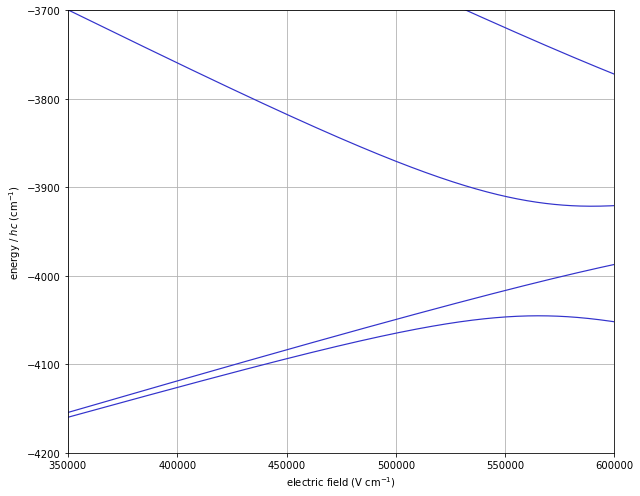

In [4]:
fig, ax = plt.subplots(figsize=(9, 7))

# plot
#MJ = 0
indexes = range(mat0.num_states)
#indexes = mat0.where('J', 11)
for ix in indexes:
    ax.plot(Efield, 1e-2*sm0[:, ix] / (h * c), ls='-', lw=1.2, alpha=1, c=(0.2, 0.2, 0.8))
#MJ = 1
#indexes = range(mat1.num_states)
#for ix in indexes:
#    ax.plot(Efield, 1e-2*sm1[:, ix] / (h * c), ls='--', lw=1., alpha=1, c=(0.8, 0.2, 0.2))

# format
ax.set_xlabel('electric field (V cm$^{-1}$)')
ax.set_ylabel('energy / $h c$ (cm$^{-1}$)')
ax.set_xlim(3.5*10**5, 6.0*10**5)
ax.set_ylim(-4200, -3700)

# output
plt.grid()
plt.tight_layout()
fileout = os.path.join("../images/stark_n31_singlet_MJ2_MJ29.png")
#plt.savefig(fileout, dpi=150)
#plt.show()

# Testing 

In [77]:
from sympy.physics.wigner import wigner_3j
L_1 = 6
L_2 = 5
ML_1 = 1
ML_2 = 1

In [78]:
ang_overlap(L_1, L_2, ML_1, ML_2, Efield_vec=[0.0, 0.0, 1.0])

0.4947274449181537

In [79]:
tmp = []
for q, tau in zip([0], [1]):
    wigner_tmp = wigner_3j(L_2, 1, L_1, -ML_2, q, ML_1)
    if wigner_tmp != 0.0:
        wigner_tmp = wigner_tmp.evalf()
    tmp.append(( tau * wigner_tmp * np.max([L_1, L_2])**0.5))
np.sum(tmp)

-0.494727444918154

In [68]:
L_1 = 4
L_2 = 4
ML_1 = 3
ML_2 = 2

In [69]:
ang_overlap(L_1, L_2, ML_1, ML_2, Efield_vec=[1.0, 0.0, 0.0])

0.0

In [70]:
tmp = []
for q, tau in zip([-1, 1], [(-1/2**0.5), (1/2**0.5)]):
    wigner_tmp = wigner_3j(L_2, 1, L_1, -ML_2, q, ML_1)
    if wigner_tmp != 0.0:
        wigner_tmp = wigner_tmp.evalf()
    tmp.append(( tau * wigner_tmp * np.max([L_1, L_2])**0.5))
np.sum(tmp)


-0.278886675511358

In [9]:
constants_info()

,Constant,Value
0,"speed of light in vacuum, $c$",299792458
1,"Planks constant, $h$",6.62607004e-34
2,"Reduced Planks constant, $\hbar$",1.0545718e-34
3,"Rydberg constant, $R_{\infty}$",10973731.568508
4,"electron charge, $e$",1.6021766208e-19
5,fine structure constant,0.0072973525664
6,"permeability of free space, $\mu_B$",1.66053904e-27
7,Hatree energy,4.3597446510117e-18
8,"Bohr radius, $a_0$",5.2917721048e-11
9,"Bohr magneton, $\mu_B$",9.2740099908307e-24
